# The simplest possible model: OCP as a function of SoC with capacity

The potential of the cell is determined only by the cathode open circuit potential and its State of Charge (SoC)

$$
U_p(SoC)
$$

The cathode SoC changes with respect to time depending only on the cell current $I(t)$ divided by the electrode capacity $C_i$.

$$
\frac{dSoC(t)}{dt} = \frac{I(t)}{C_i}
$$



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# Defining the Open circuit voltage of the positive electrode
def U_p(SoC):
    sto = (0.36-1) / 1 * SoC + 1 # Simple conversion limiting 100%SoC at 0.36% stoichiometry
    x = sto
    p = np.array([ 0.74041974,  4.39107343,  0.03434767, 18.16841489,  0.53463176, 17.68283504, 14.59709162,  0.28835348, 17.58474971, 14.69911523,  0.28845641])

    return (
            -p[0] * x
            + p[1]
            - p[2] * np.tanh(p[3] * (x - p[4]))
            - p[5] * np.tanh(p[6] * (x - p[7]))
            + p[8] * np.tanh(p[9] * (x - p[10]))
        )

In [4]:
def I(t):
    if t < 3:
        return 1
    else:
        return -1

# Defining our equations to solve
def dSoCdt_p(t, s):
    C_i = 3.2
    return I(t) / C_i

In [5]:
t_eval = np.linspace(0, 6, 100)
t_span = [min(t_eval), max(t_eval)]
s = [0] # 3.2Ah converted to As
c_p_sol = solve_ivp(dSoCdt_p, t_span, s, t_eval=t_eval)

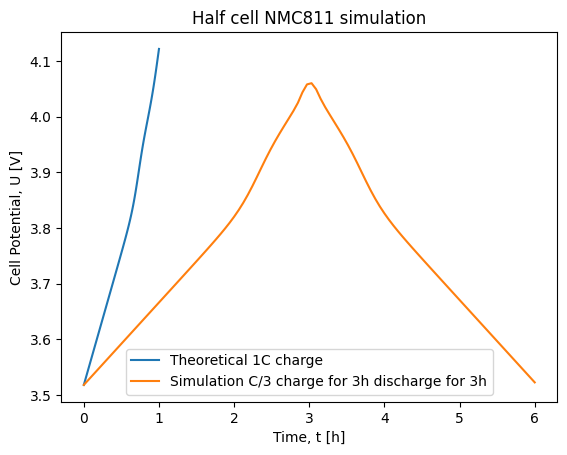

In [6]:
x = np.linspace(0, 1, 100)
plt.plot(x, U_p(x), label="Theoretical 1C charge")

plt.plot(c_p_sol.t, U_p(c_p_sol.y[0]), label="Simulation C/3 charge for 3h discharge for 3h")
# plt.axhline(3)
# plt.axhline(4.2)
plt.title("Half cell NMC811 simulation")
plt.xlabel("Time, t [h]")
plt.ylabel("Cell Potential, U [V]")
plt.legend()

# c_p_sol.y[0]